# Import Libraries and Necessary Installation

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,recall_score,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.inspection import permutation_importance
import time

In [2]:
os.getcwd()

'C:\\Users\\13158\\OneDrive - softytechss\\NJIT\\Books\\1st Sem\\Data Mining\\Project - Breast Cancer'

In [3]:
#Change directory if necessary
os.chdir('/Users/13158')

In [4]:
os.getcwd()

'C:\\Users\\13158'

# Read File

#Load the dataset into a dataframe

In [5]:
df=pd.read_csv("Breast_cancer_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
1134,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
1135,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
1136,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Check Memory Usage

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1138 non-null   int64  
 1   diagnosis                1138 non-null   object 
 2   radius_mean              1138 non-null   float64
 3   texture_mean             1138 non-null   float64
 4   perimeter_mean           1138 non-null   float64
 5   area_mean                1138 non-null   float64
 6   smoothness_mean          1138 non-null   float64
 7   compactness_mean         1138 non-null   float64
 8   concavity_mean           1138 non-null   float64
 9   concave points_mean      1138 non-null   float64
 10  symmetry_mean            1138 non-null   float64
 11  fractal_dimension_mean   1138 non-null   float64
 12  radius_se                1138 non-null   float64
 13  texture_se               1138 non-null   float64
 14  perimeter_se            

# Exploratory Data Analysis

#Show Shape of Dataset

In [7]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1138, 32)


#Feature Size

In [8]:
Feature_Size = len(df.columns)
print("Feature_Size for Data =", Feature_Size)

Feature_Size for Data = 32


#Feature Names

In [9]:
for col in df.columns:
    print(col)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


#Show data types

In [10]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
display(df.dtypes.value_counts())

float64    30
int64       1
object      1
dtype: int64

#Show Statistics

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,1.138000e+03,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,...,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.249656e+08,3.522499,4.299144,24.288293,351.759340,0.014058,0.052790,0.079685,0.038786,0.027402,...,4.831116,6.143554,33.587762,569.106561,0.022822,0.157267,0.208533,0.065703,0.061840,0.018053
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#Show Percentage of Malignant vs Benign

In [13]:
Total_Cases = len(df)
Benign = len(df[df.diagnosis == 'B'])
Malignant = len(df[df.diagnosis == 'M'])
Benign_percentage = round(Benign/Total_Cases*100, 2)
Malignant_percentage = round(Malignant/Total_Cases*100, 2)
print('Total number of Cases are {}'.format(Total_Cases))
print('Number of Benign Cases are {}'.format(Benign))
print('Number of Malignant Cases are {}'.format(Malignant))
print('Percentage of Malignant is {}'.format(Malignant_percentage))
print('Percentage of Benign is {} :'.format(Benign_percentage))

Total number of Cases are 1138
Number of Benign Cases are 714
Number of Malignant Cases are 424
Percentage of Malignant is 37.26
Percentage of Benign is 62.74 :


#Show Statistics for Benign Cases

In [14]:
Benign_cases = df[df.diagnosis == 'B']
Benign_cases.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.00000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.51507,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.166578e+08,1.779263,3.992322,11.799155,134.192915,0.013437,0.033726,0.043412,0.015898,0.024789,...,1.979978,5.49010,13.517602,163.486656,0.019999,0.092115,0.140269,0.035772,0.041715,0.013794
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.02000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.58000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.82000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.51000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.78000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


#Show Statistics for Malignant Cases

In [15]:
Malignant_cases = df[df.diagnosis == 'M']
Malignant_cases.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.377335e+08,3.200182,3.775000,21.828805,367.502805,0.012593,0.053924,0.074931,0.034333,0.027605,...,4.278503,5.428376,29.422215,597.260507,0.021844,0.170170,0.181292,0.046253,0.074597,0.021527
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


#Show Numerical and Categorical Variables

In [16]:
numerical_var = df.columns[df.dtypes != 'object']
categorical_var = df.columns[df.dtypes == object]

print(numerical_var)
print(categorical_var)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Index(['diagnosis'], dtype='object')


#Check for Duplicates

In [17]:
df.duplicated().sum()

569

#Check for Null values

In [18]:
df.isnull().values.any()

False

In [19]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1138 non-null   int64  
 1   diagnosis                1138 non-null   object 
 2   radius_mean              1138 non-null   float64
 3   texture_mean             1138 non-null   float64
 4   perimeter_mean           1138 non-null   float64
 5   area_mean                1138 non-null   float64
 6   smoothness_mean          1138 non-null   float64
 7   compactness_mean         1138 non-null   float64
 8   concavity_mean           1138 non-null   float64
 9   concave points_mean      1138 non-null   float64
 10  symmetry_mean            1138 non-null   float64
 11  fractal_dimension_mean   1138 non-null   float64
 12  radius_se                1138 non-null   float64
 13  texture_se               1138 non-null   float64
 14  perimeter_se            

#Check for any negative values

In [20]:
(df[numerical_var] < 0).values.any()

False

In [21]:
df1 = df
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
1134,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
1135,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
1136,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
for col in df1.columns:
    if df1[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(df1[col].astype(str).values))
        df1[col] = le.transform(list(df1[col].astype(str).values))

In [23]:
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
1134,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
1135,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
1136,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Visualization

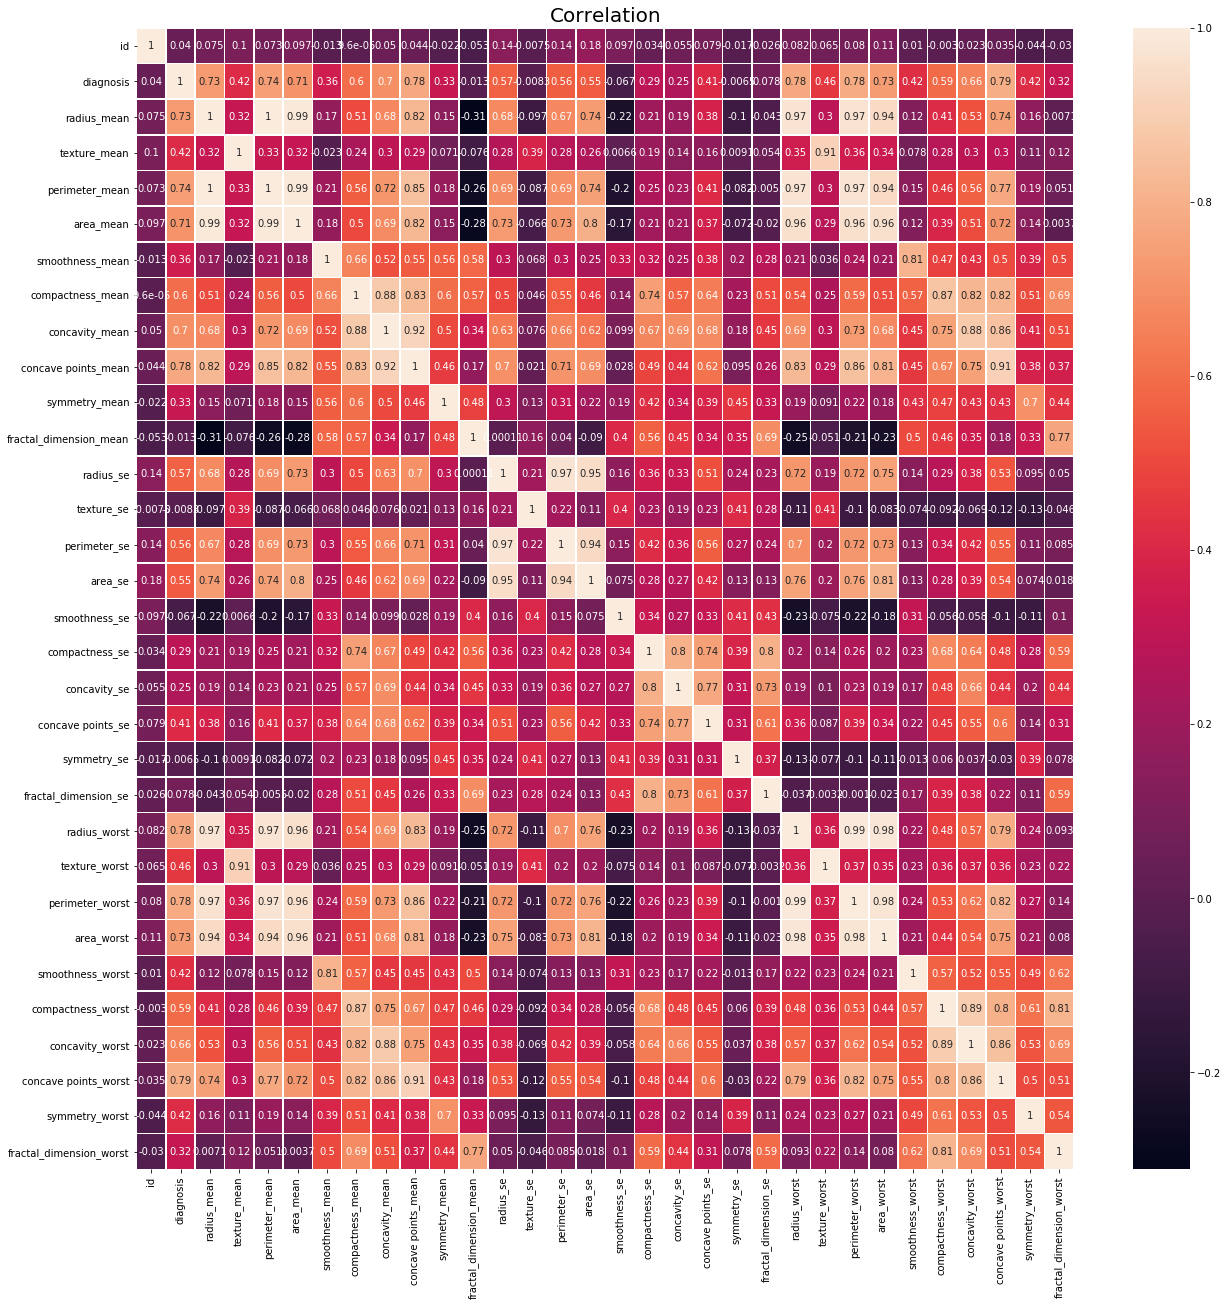

In [24]:
#Correlation

plt.figure(figsize=(21,21))
plt.title("Correlation", fontsize=20)
sns.heatmap(df1.corr(),Linewidth=0.5, annot=True, linecolor='white')

In [25]:
df_sliced = df.iloc[:,1:30]
df_sliced

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216
1134,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628
1135,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418
1136,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650


In [26]:
df_sliced.drop(df_sliced.columns[[2, 5, 9, 10, 12, 15, 16, 17, 18, 19, 20]], axis = 1, inplace = True)
df_sliced

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216
1134,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628
1135,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418
1136,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650


In [27]:
df_sliced.drop(df_sliced.columns[[11, 14]], axis = 1, inplace = True)
df_sliced

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
1134,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
1135,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
1136,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


<Figure size 3600x3600 with 0 Axes>

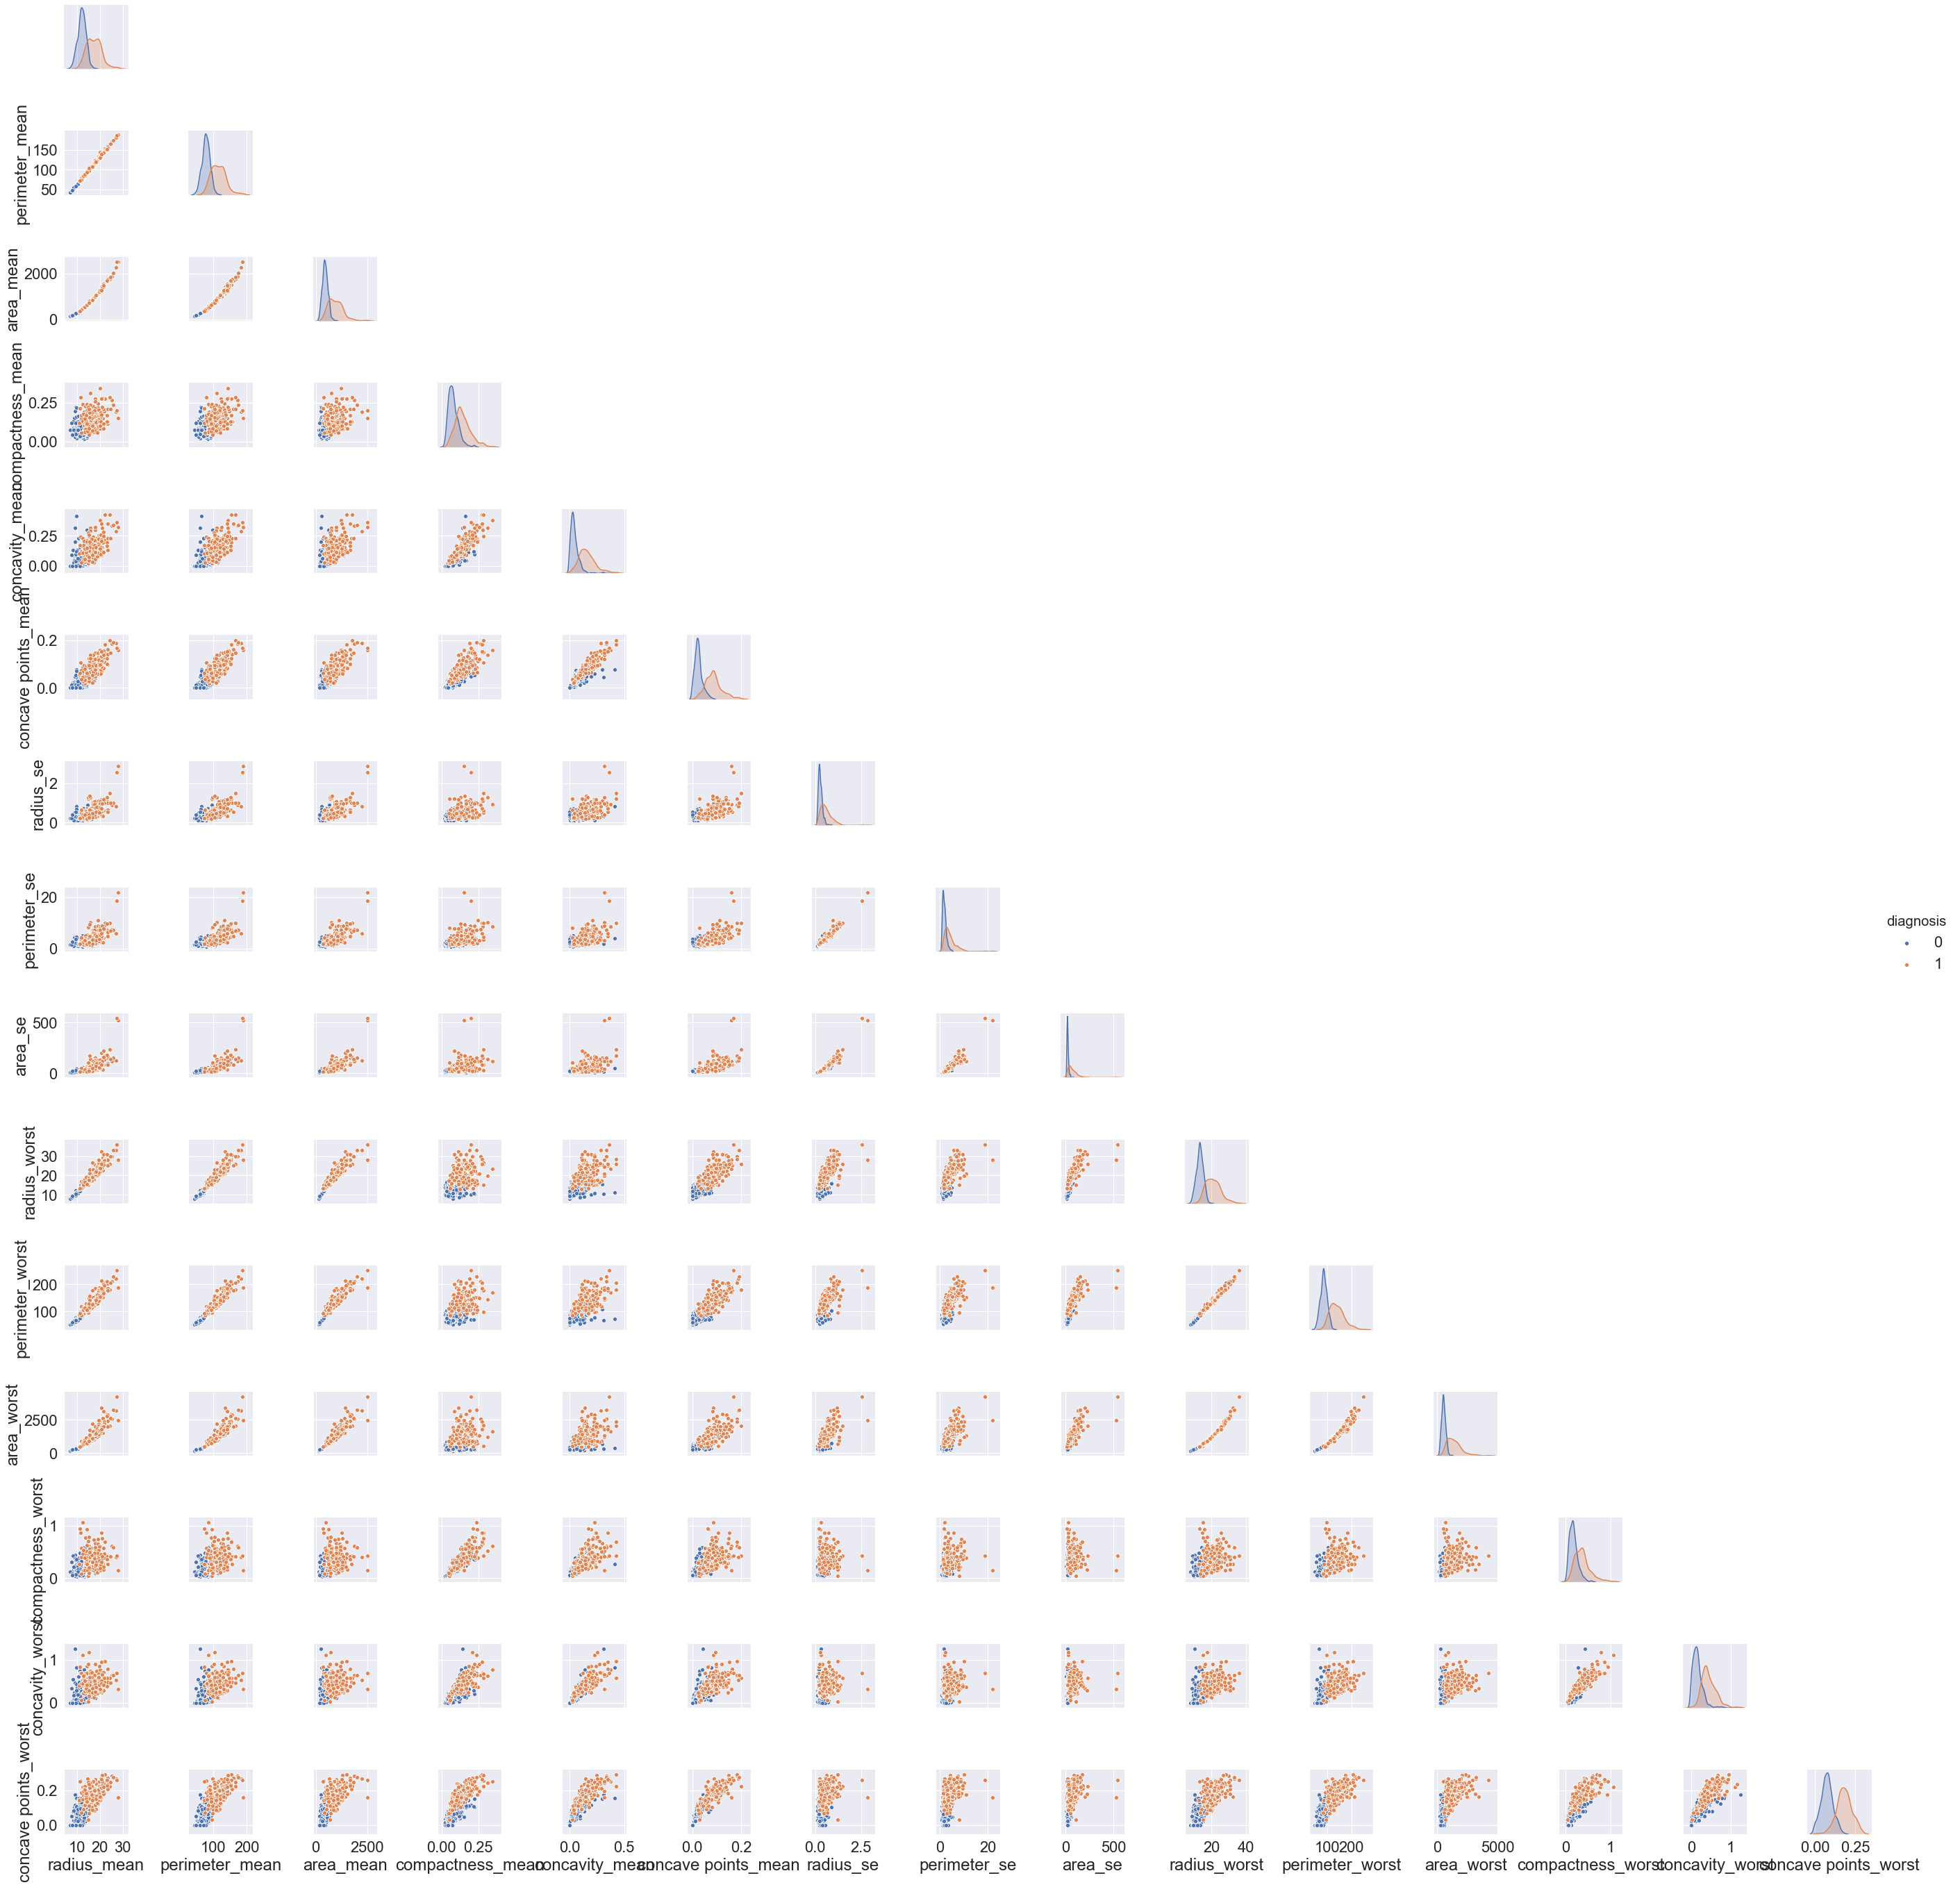

In [28]:
plt.figure(figsize=(50,50))
sns.set(font_scale=2)
sns.pairplot(df_sliced, hue="diagnosis", corner=True)

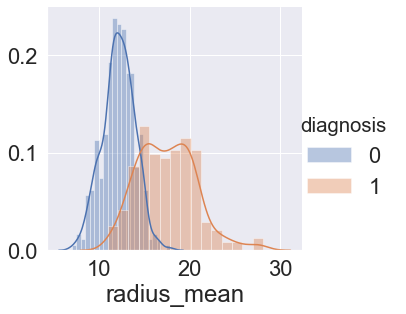

In [29]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"radius_mean")\
. add_legend();
plt.show()

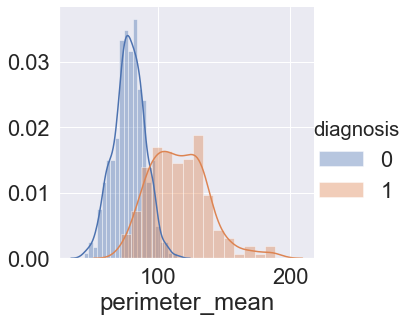

In [30]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"perimeter_mean")\
. add_legend();
plt.show()

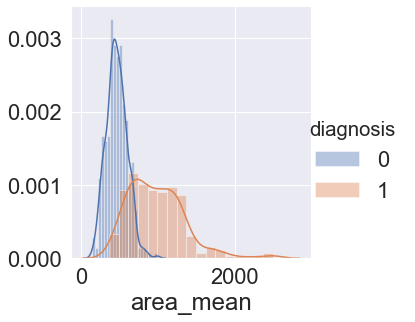

In [31]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"area_mean")\
. add_legend();
plt.show()

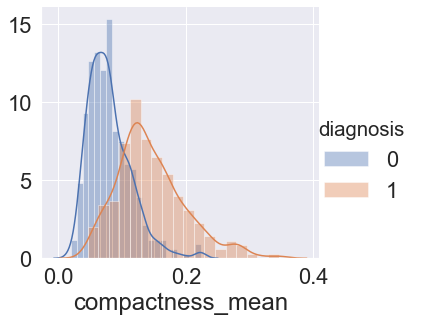

In [32]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"compactness_mean")\
. add_legend();
plt.show()

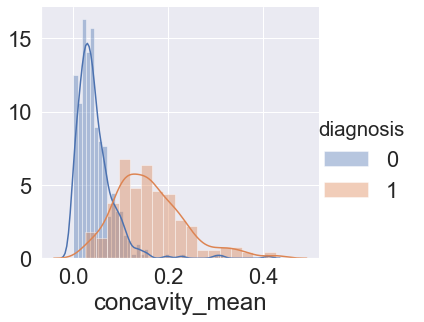

In [33]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"concavity_mean")\
. add_legend();
plt.show()

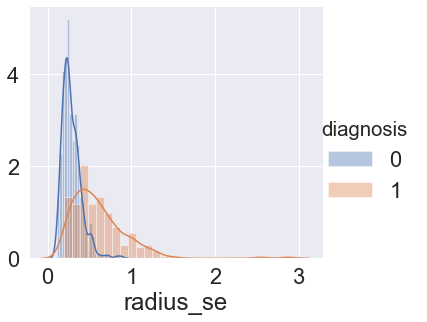

In [34]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"radius_se")\
. add_legend();
plt.show()

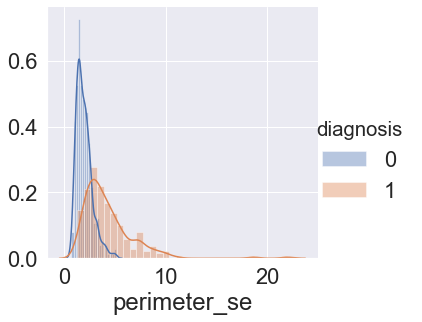

In [35]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"perimeter_se")\
. add_legend();
plt.show()

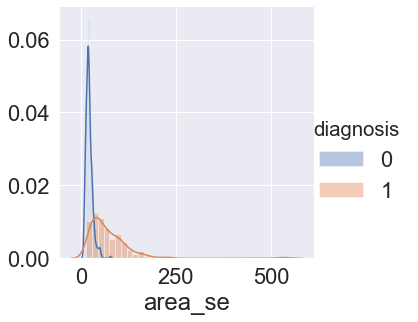

In [36]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"area_se")\
. add_legend();
plt.show()

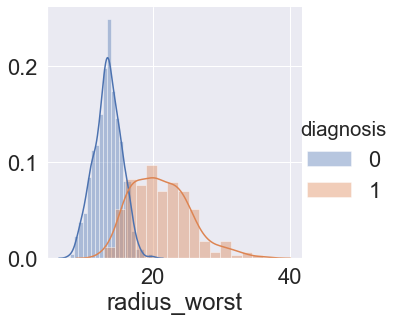

In [37]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"radius_worst")\
. add_legend();
plt.show()

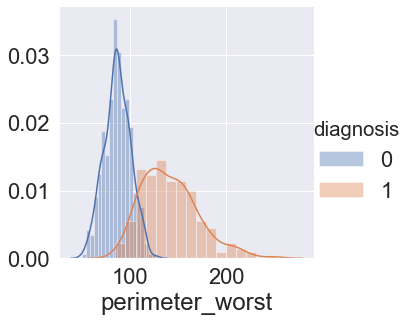

In [38]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"perimeter_worst")\
. add_legend();
plt.show()

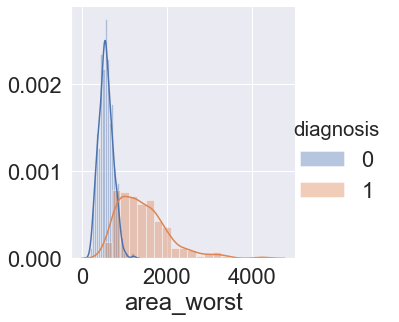

In [39]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"area_worst")\
. add_legend();
plt.show()

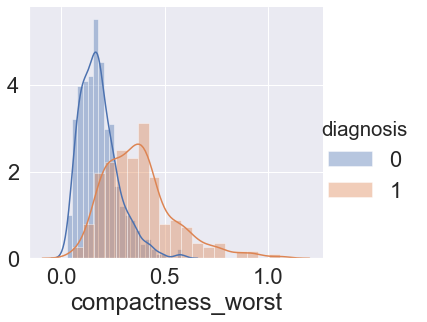

In [40]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"compactness_worst")\
. add_legend();
plt.show()

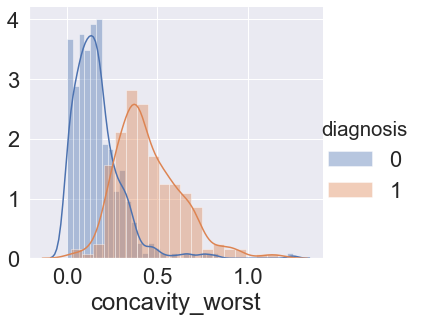

In [41]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"concavity_worst")\
. add_legend();
plt.show()

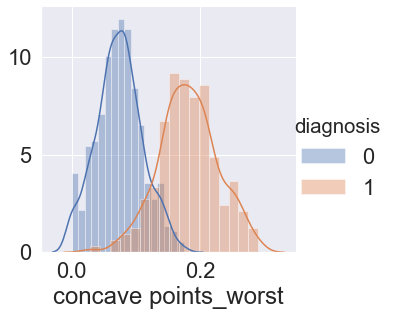

In [42]:
sns.FacetGrid(df,hue='diagnosis',height = 5)\
.map(sns.distplot,"concave points_worst")\
. add_legend();
plt.show()

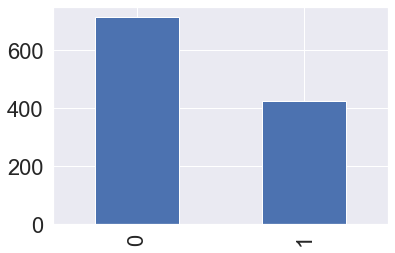

In [43]:
#Histogram for Diagnosis record counts

df['diagnosis'].value_counts().plot(kind='bar')

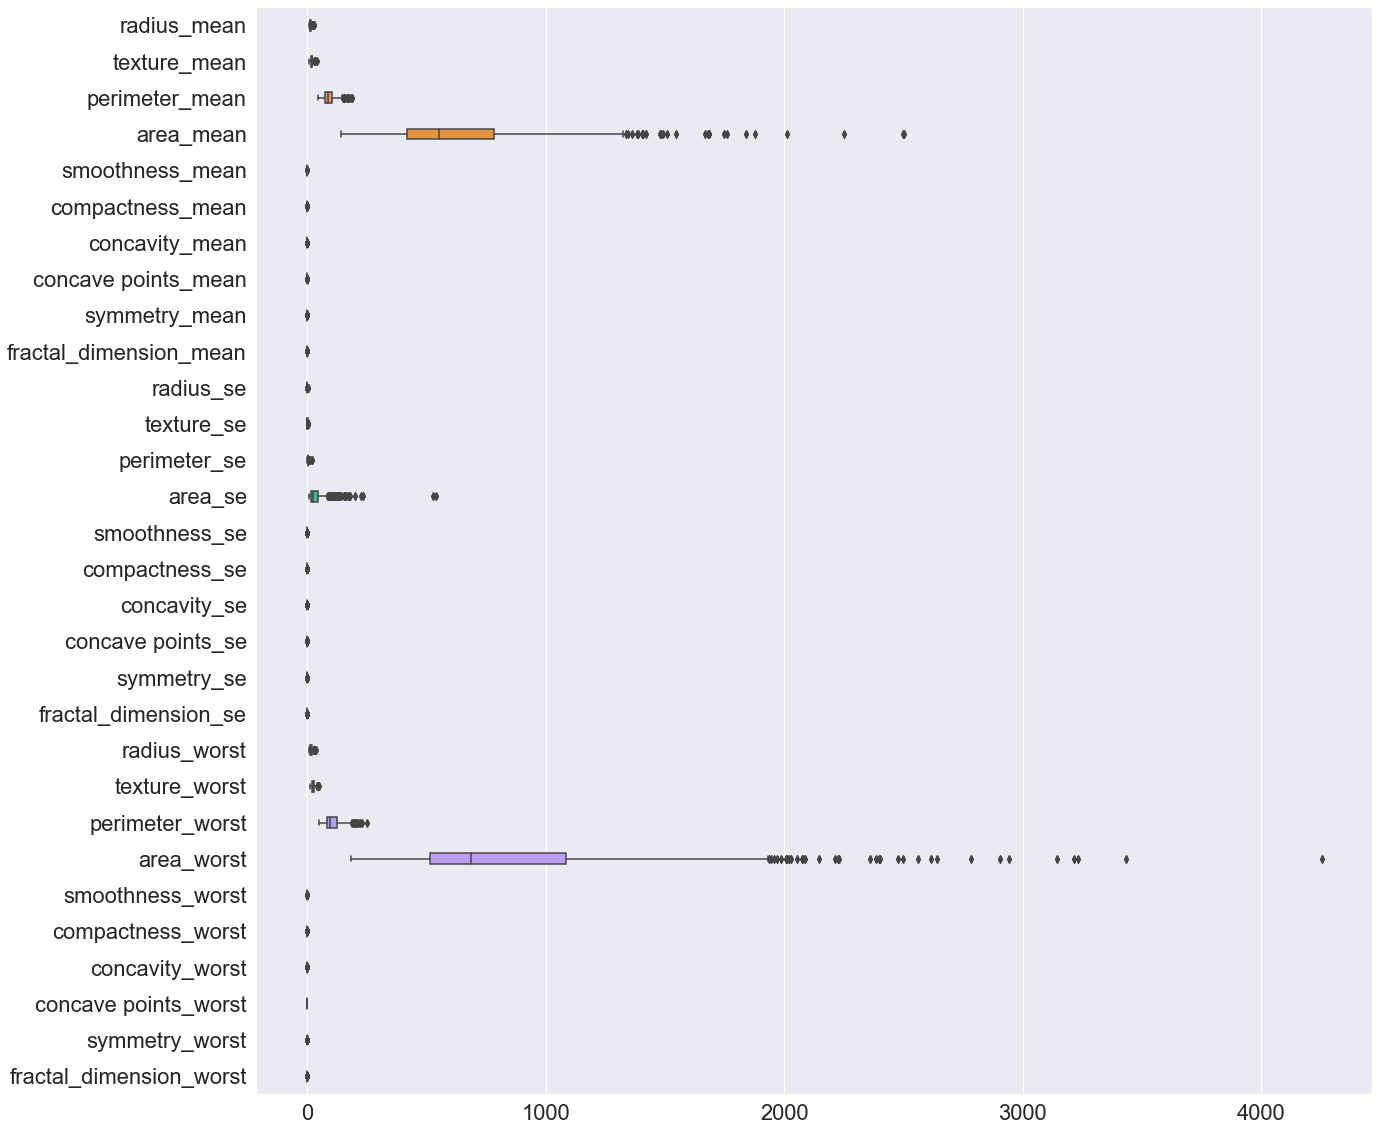

In [44]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df.drop(['id', 'diagnosis'], axis=1), width=0.3, saturation=0.9, orient="h")

In [45]:
features_mean=list(df.columns[1:11])
features_mean

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']

In [46]:
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis']==0]

In [47]:
dfM

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
1133,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
1134,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
1135,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [48]:
dfB

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,925277,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
1128,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
1129,925292,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
1130,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


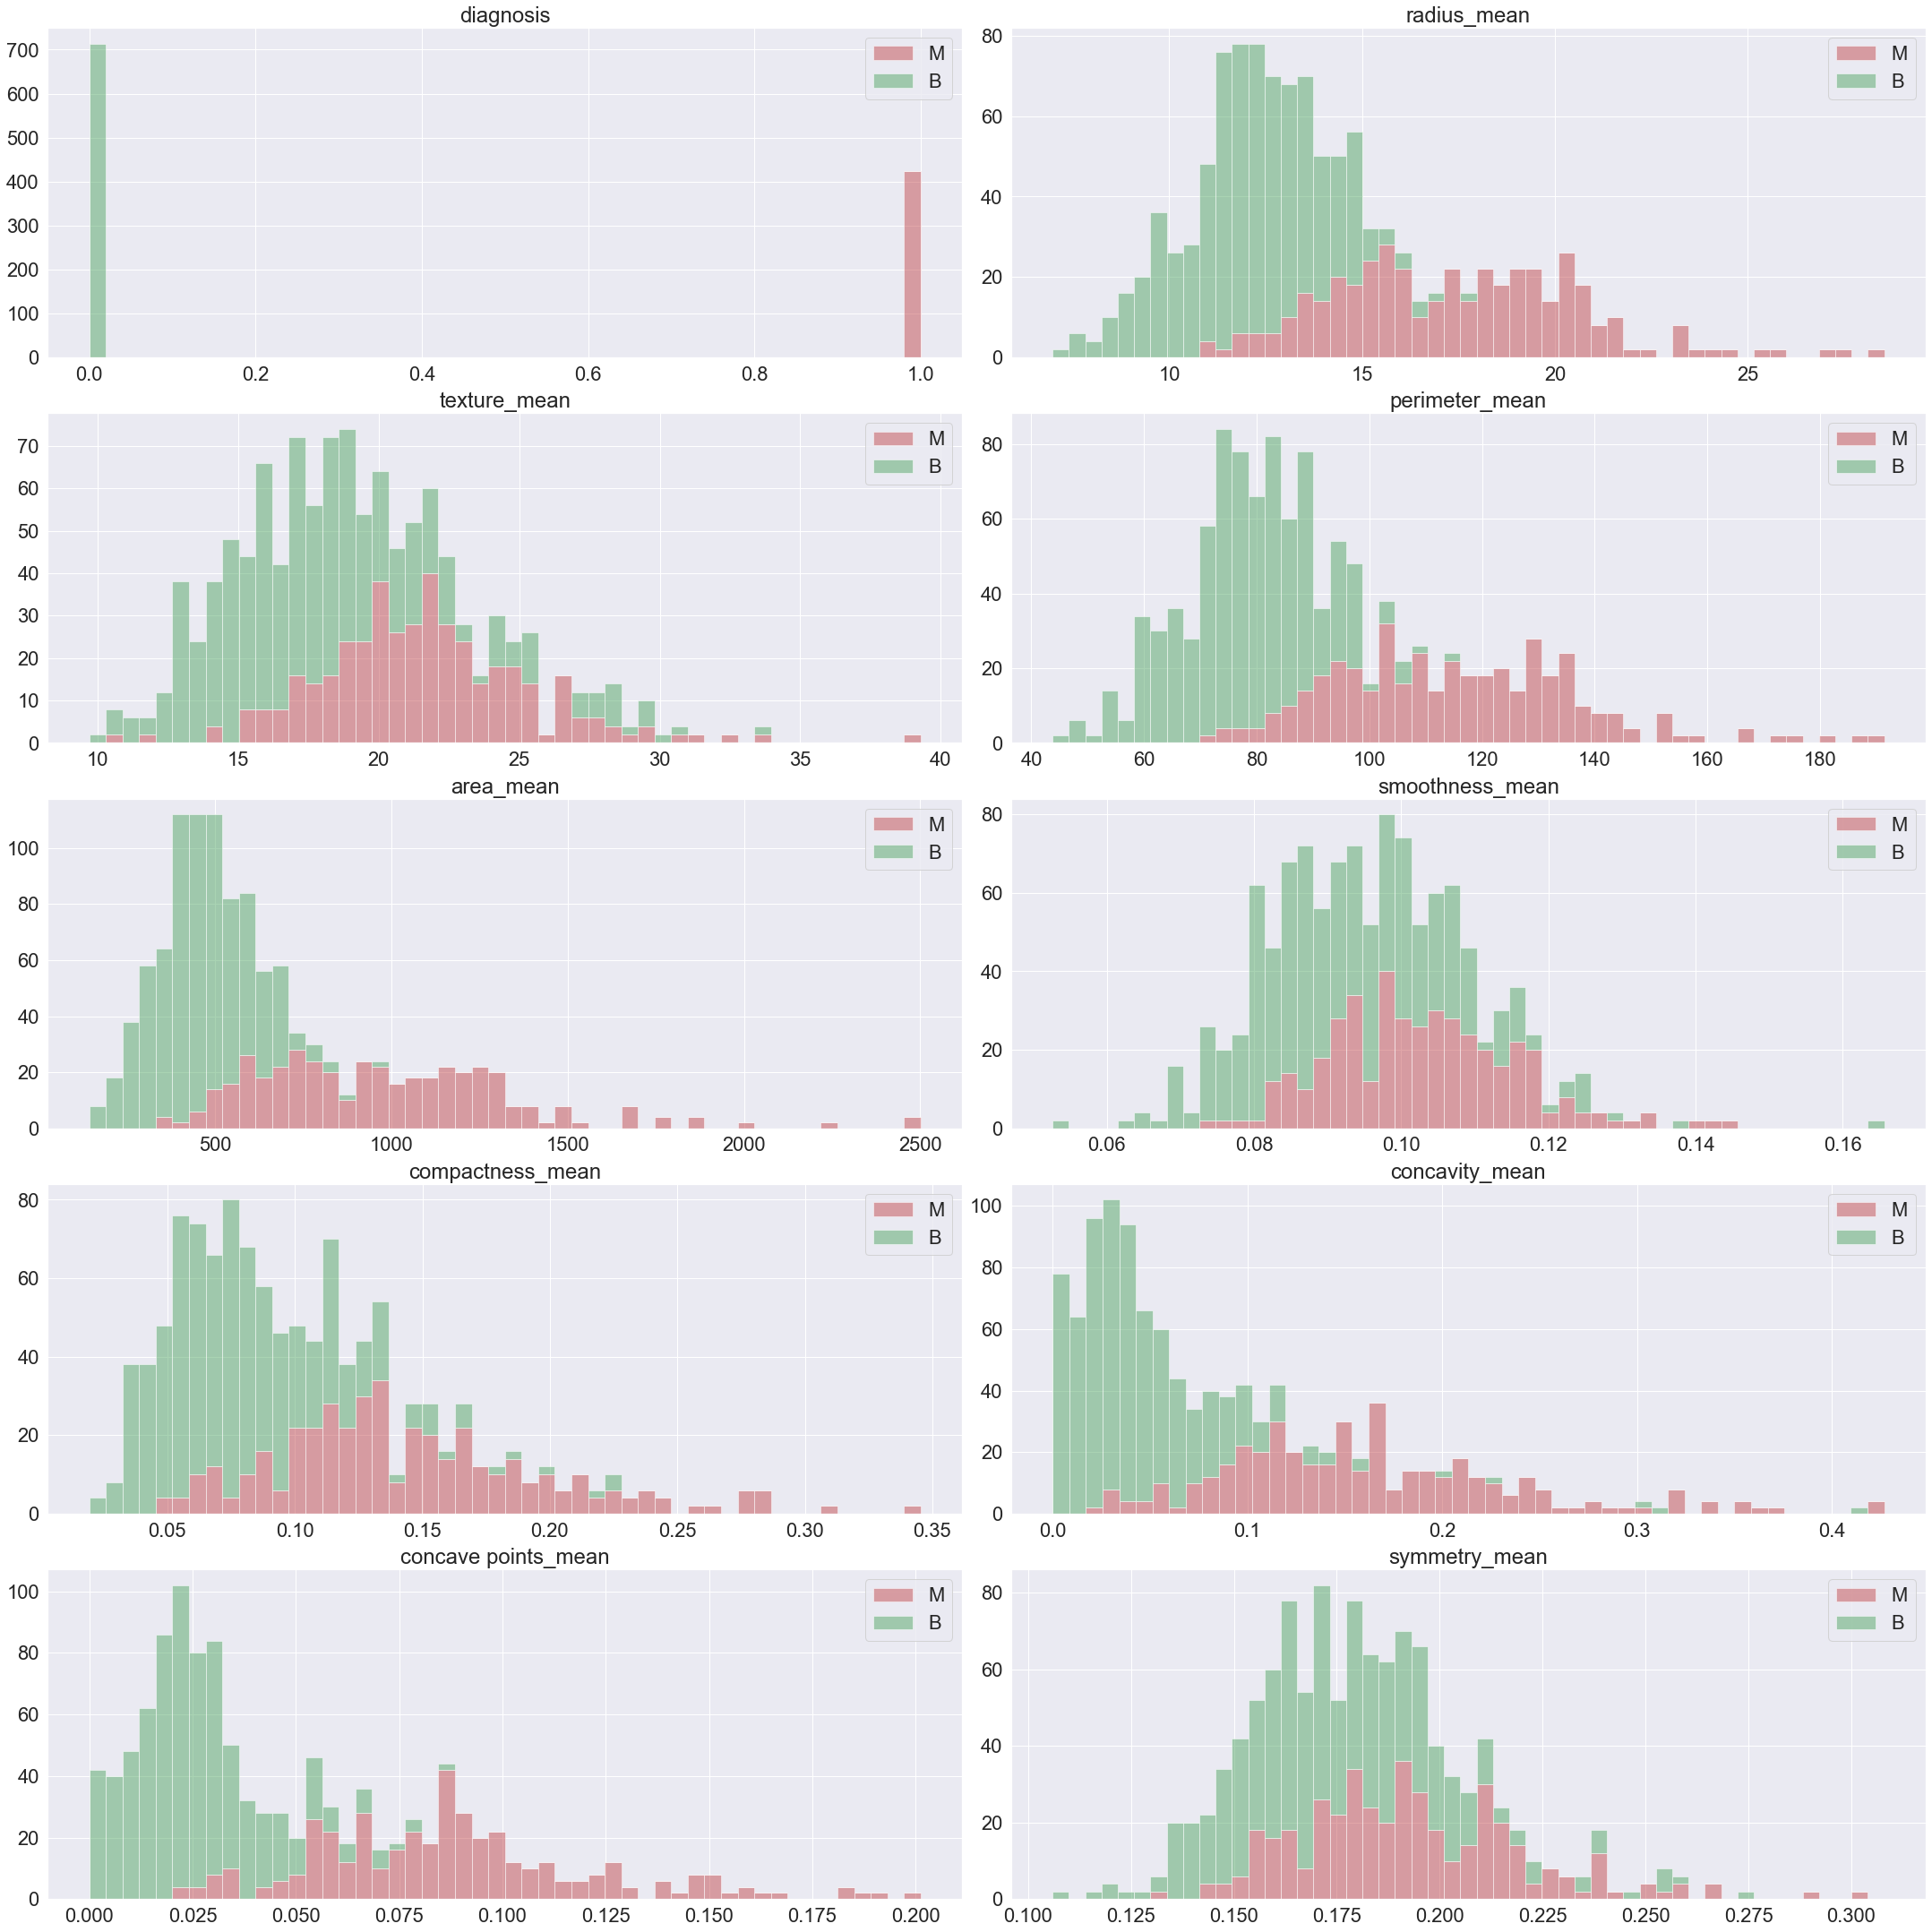

In [49]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30,30))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc= 'upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [50]:
features_worst=list(df.columns[22:32])
features_worst

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

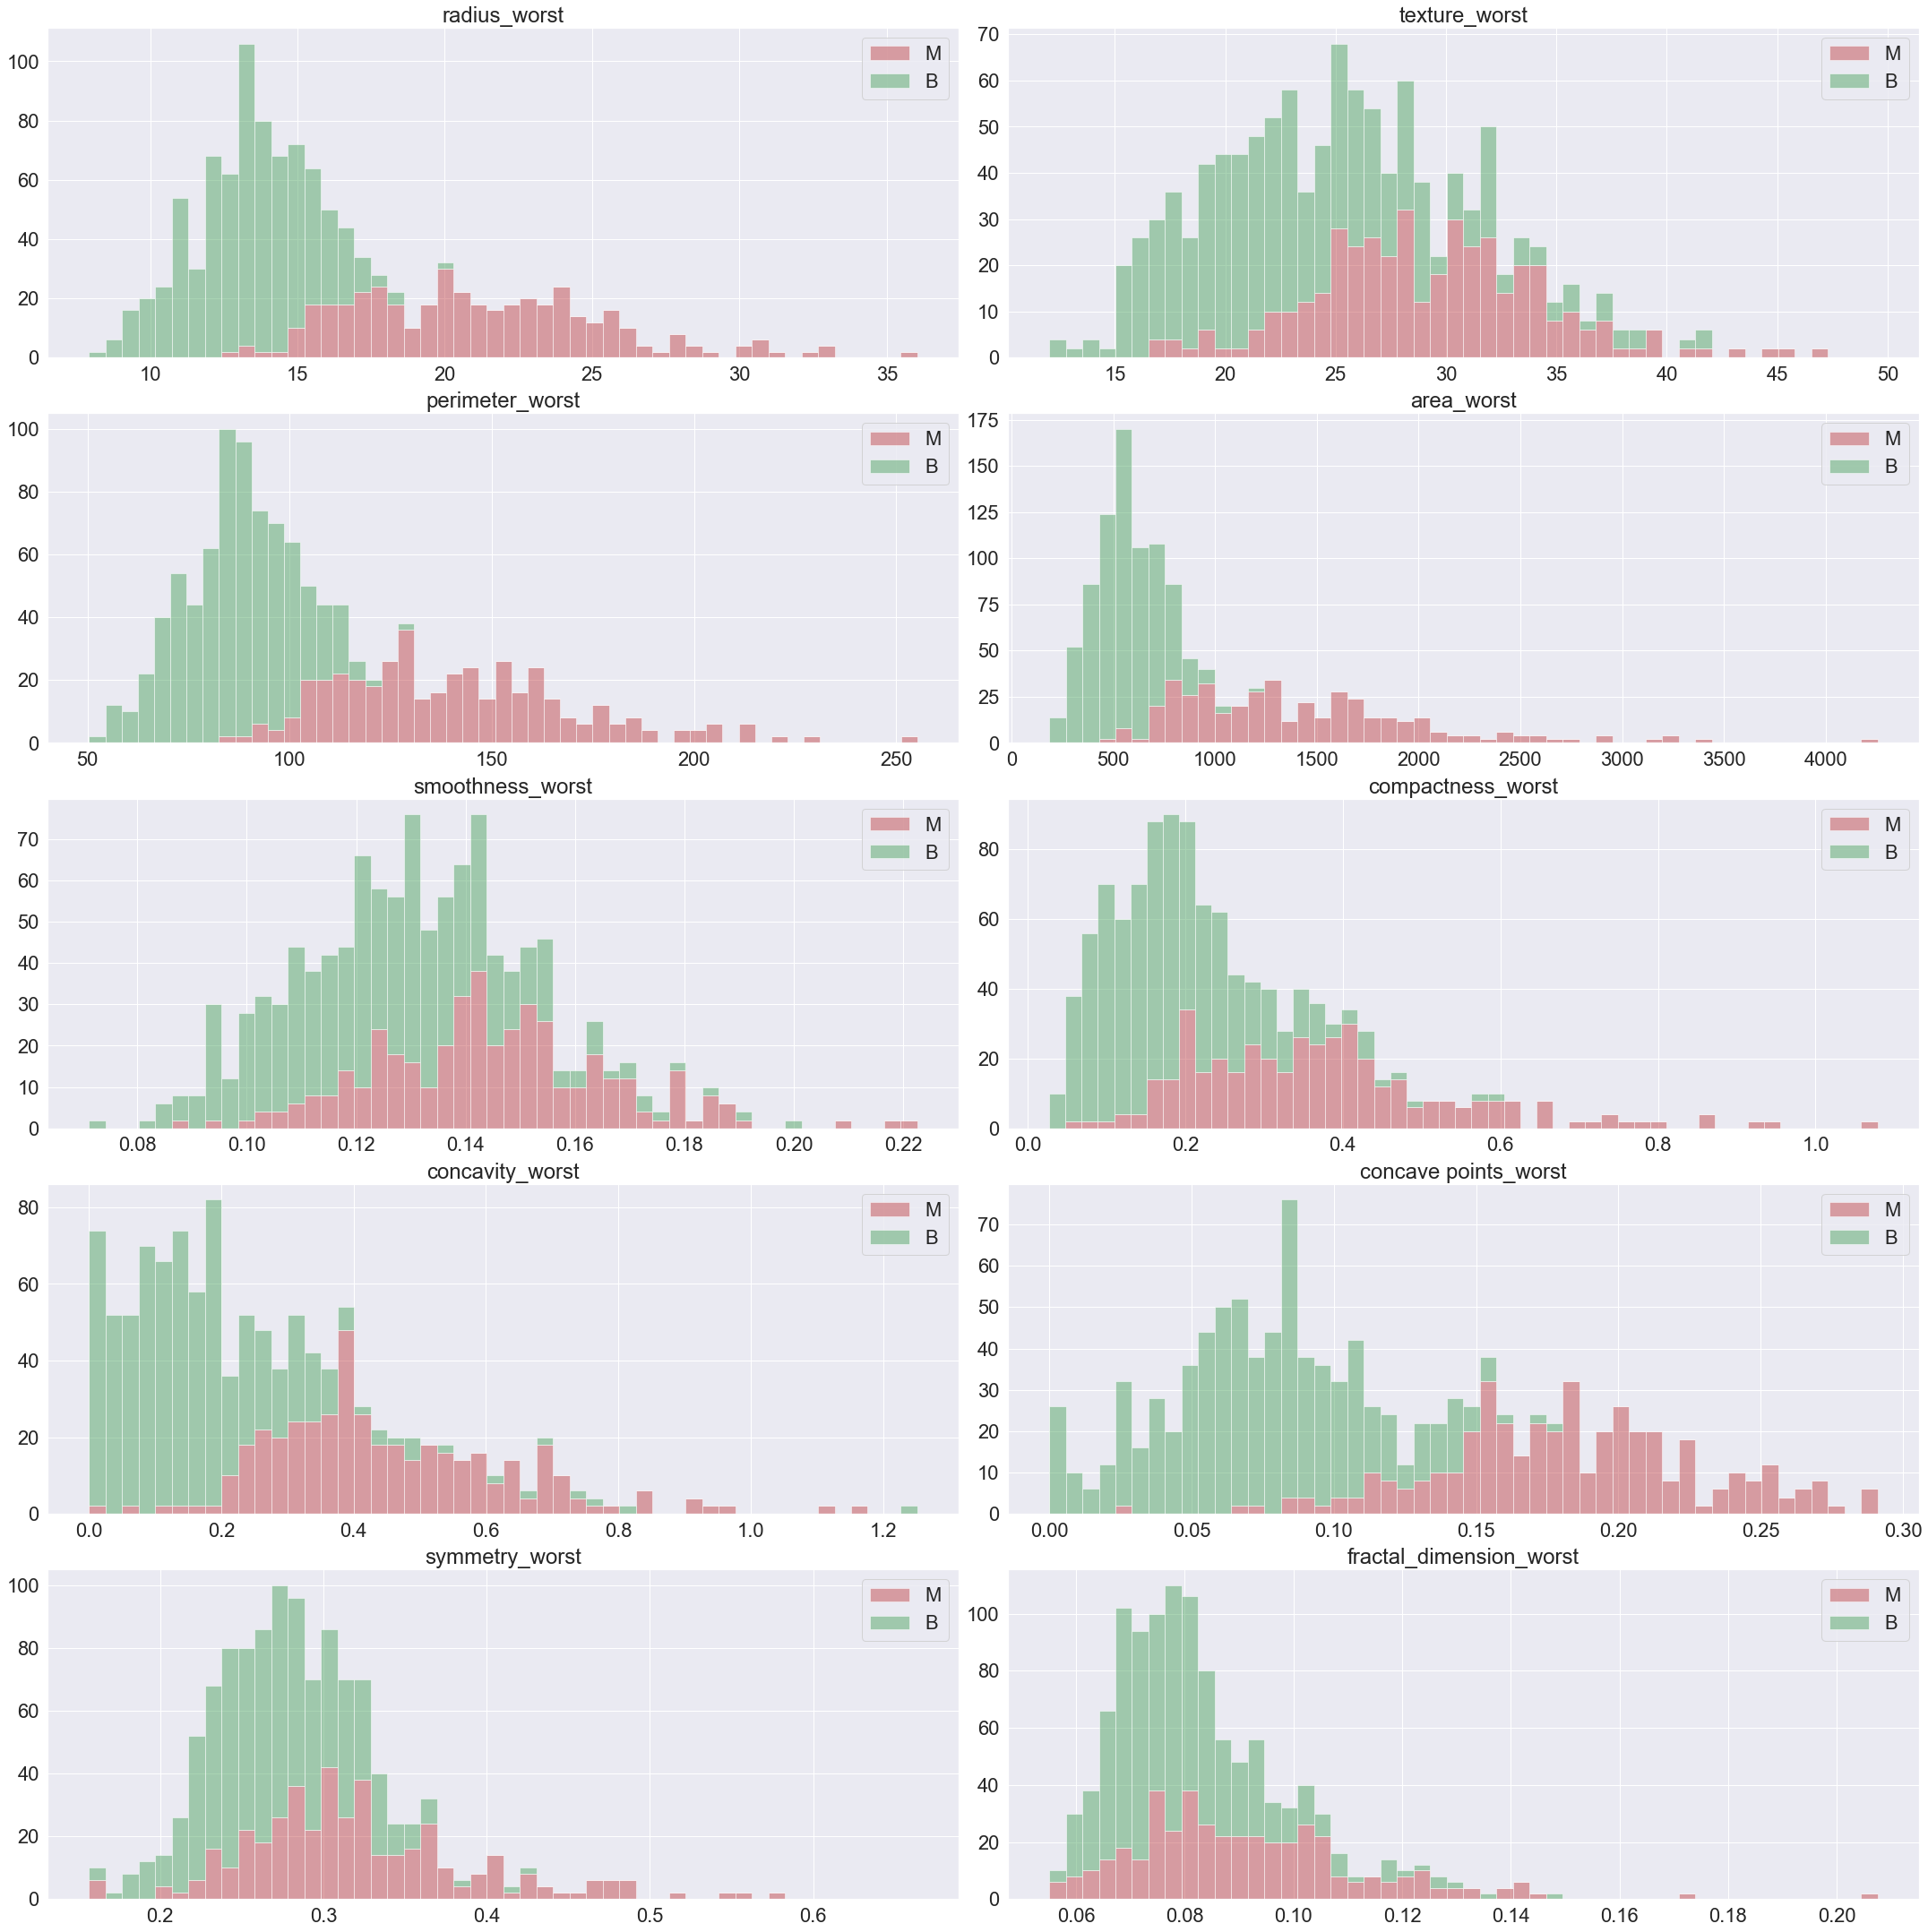

In [51]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30,30))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_worst[idx]]) - min(df[features_worst[idx]]))/50
    ax.hist([dfM[features_worst[idx]],dfB[features_worst[idx]]], bins=np.arange(min(df[features_worst[idx]]), max(df[features_worst[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc= 'upper right')
    ax.set_title(features_worst[idx])
plt.tight_layout()
plt.show()

In [52]:
features_se=list(df.columns[12:22])
features_se

['radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se']

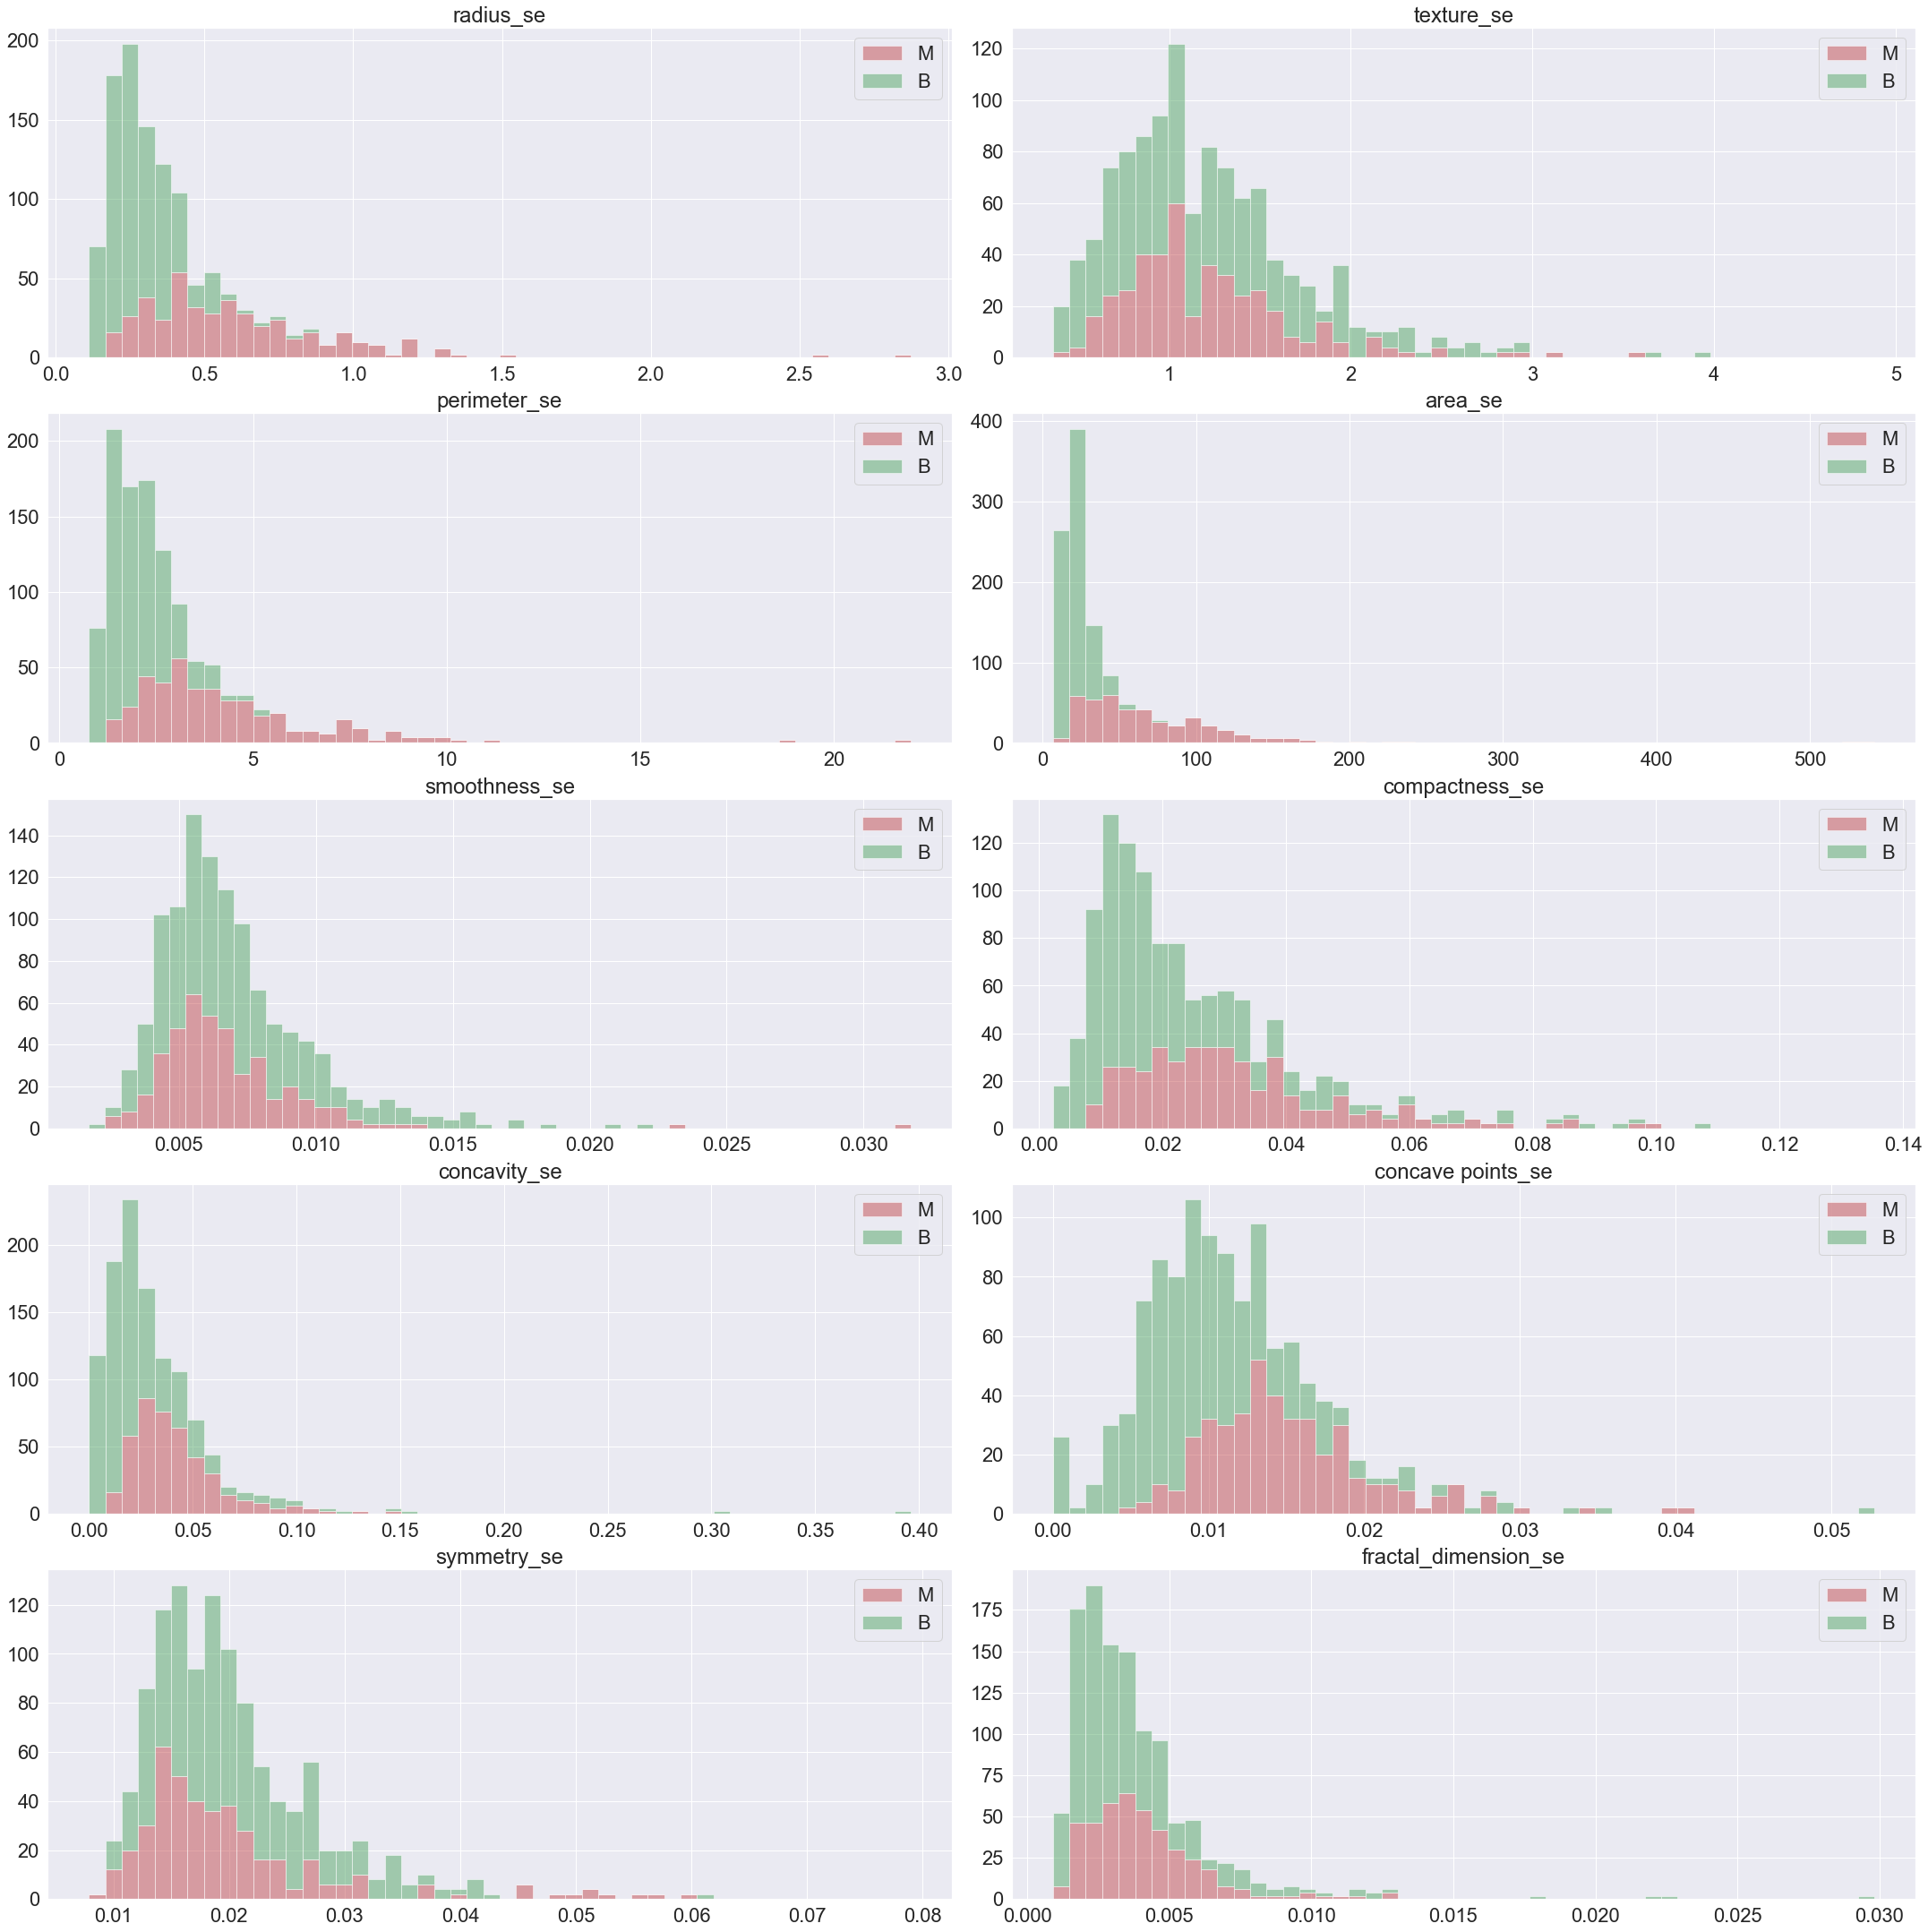

In [53]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30,30))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_se[idx]]) - min(df[features_se[idx]]))/50
    ax.hist([dfM[features_se[idx]],dfB[features_se[idx]]], bins=np.arange(min(df[features_se[idx]]), max(df[features_se[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc= 'upper right')
    ax.set_title(features_se[idx])
plt.tight_layout()
plt.show()

# Feature Engineering

#Drop Duplicates

In [54]:
df.drop_duplicates(inplace = True)

In [55]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Outlier Handling

In [56]:
#Find Outliers

outliers = []
df.loc[:,'area_worst']
def find_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    # print(lower_bound, upper_bound)
    for i in data: 
        if (i<lower_bound or i>upper_bound):
            outliers.append(i)
    return outliers
sample_outliers_1 = find_outliers(df.loc[:,'area_worst'])
print("Outliers for Area_worst using IQR method: ", sample_outliers_1)

Outliers for Area_worst using IQR method:  [1938.0, 1946.0, 1956.0, 1972.0, 1986.0, 2009.0, 2010.0, 2019.0, 2022.0, 2027.0, 2053.0, 2073.0, 2081.0, 2089.0, 2145.0, 2215.0, 2227.0, 2232.0, 2360.0, 2384.0, 2398.0, 2403.0, 2477.0, 2499.0, 2562.0, 2615.0, 2642.0, 2782.0, 2906.0, 2944.0, 3143.0, 3216.0, 3234.0, 3432.0, 4254.0]


In [57]:
df_outlier_1 = df[df["area_worst"].isin ([1938.0, 1946.0, 1956.0, 1972.0, 1986.0, 2009.0, 2010.0, 2019.0, 2022.0, 2027.0, 2053.0, 2073.0, 2081.0, 2089.0, 2145.0, 2215.0, 2227.0, 2232.0, 2360.0, 2384.0, 2398.0, 2403.0, 2477.0, 2499.0, 2562.0, 2615.0, 2642.0, 2782.0, 2906.0, 2944.0, 3143.0, 3216.0, 3234.0, 3432.0, 4254.0])]
df_outlier_1


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
18,849014,1,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.1479,0.09498,...,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
23,851509,1,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
24,852552,1,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,...,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
56,857637,1,19.21,18.57,125.5,1152.0,0.10530,0.12670,0.1323,0.08994,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
162,871201,1,19.59,18.15,130.7,1214.0,0.11200,0.16660,0.2508,0.12860,...,26.73,26.39,174.9,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223


In [58]:
sample_outliers_2 = find_outliers(df.loc[:,'area_mean'])
print("Outliers for Area_mean using IQR method: ", sample_outliers_2)

Outliers for Area_mean using IQR method:  [1938.0, 1946.0, 1956.0, 1972.0, 1986.0, 2009.0, 2010.0, 2019.0, 2022.0, 2027.0, 2053.0, 2073.0, 2081.0, 2089.0, 2145.0, 2215.0, 2227.0, 2232.0, 2360.0, 2384.0, 2398.0, 2403.0, 2477.0, 2499.0, 2562.0, 2615.0, 2642.0, 2782.0, 2906.0, 2944.0, 3143.0, 3216.0, 3234.0, 3432.0, 4254.0, 1335.0, 1347.0, 1364.0, 1384.0, 1386.0, 1404.0, 1407.0, 1419.0, 1479.0, 1482.0, 1491.0, 1509.0, 1546.0, 1670.0, 1682.0, 1685.0, 1686.0, 1747.0, 1761.0, 1841.0, 1878.0, 2010.0, 2250.0, 2499.0, 2501.0]


In [59]:
df_outlier_2 = df[df["area_worst"].isin ([1938.0, 1946.0, 1956.0, 1972.0, 1986.0, 2009.0, 2010.0, 2019.0, 2022.0, 2027.0, 2053.0, 2073.0, 2081.0, 2089.0, 2145.0, 2215.0, 2227.0, 2232.0, 2360.0, 2384.0, 2398.0, 2403.0, 2477.0, 2499.0, 2562.0, 2615.0, 2642.0, 2782.0, 2906.0, 2944.0, 3143.0, 3216.0, 3234.0, 3432.0, 4254.0, 1335.0, 1347.0, 1364.0, 1384.0, 1386.0, 1404.0, 1407.0, 1419.0, 1479.0, 1482.0, 1491.0, 1509.0, 1546.0, 1670.0, 1682.0, 1685.0, 1686.0, 1747.0, 1761.0, 1841.0, 1878.0, 2010.0, 2250.0, 2499.0, 2501.0, 1335.0, 1347.0, 1364.0, 1384.0, 1386.0, 1404.0, 1407.0, 1419.0, 1479.0, 1482.0, 1491.0, 1509.0, 1546.0, 1670.0, 1682.0, 1685.0, 1686.0, 1747.0, 1761.0, 1841.0, 1878.0, 2010.0, 2250.0, 2499.0, 2501.0])]
df_outlier_2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
18,849014,1,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.1479,0.09498,...,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
23,851509,1,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
24,852552,1,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,...,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
30,853401,1,18.63,25.11,124.8,1088.0,0.10640,0.18870,0.2319,0.12440,...,23.15,34.01,160.5,1670.0,0.1491,0.4257,0.6133,0.1848,0.3444,0.09782
56,857637,1,19.21,18.57,125.5,1152.0,0.10530,0.12670,0.1323,0.08994,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009


#Revised Statistics after removing duplicates

In [60]:
Total_Cases = len(df)
Benign = len(df[df.diagnosis == 'B'])
Malignant = len(df[df.diagnosis == 'M'])
Benign_percentage = round(Benign/Total_Cases*100, 2)
Malignant_percentage = round(Malignant/Total_Cases*100, 2)
print('Total number of Cases are {}'.format(Total_Cases))
print('Number of Benign Cases are {}'.format(Benign))
print('Number of Malignant Cases are {}'.format(Malignant))
print('Percentage of Malignant is {}'.format(Malignant_percentage))
print('Percentage of Benign is {} :'.format(Benign_percentage))

Total number of Cases are 569
Number of Benign Cases are 0
Number of Malignant Cases are 0
Percentage of Malignant is 0.0
Percentage of Benign is 0.0 :


C:\Users\13158\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [61]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#Revised Visualization after removing duplicates

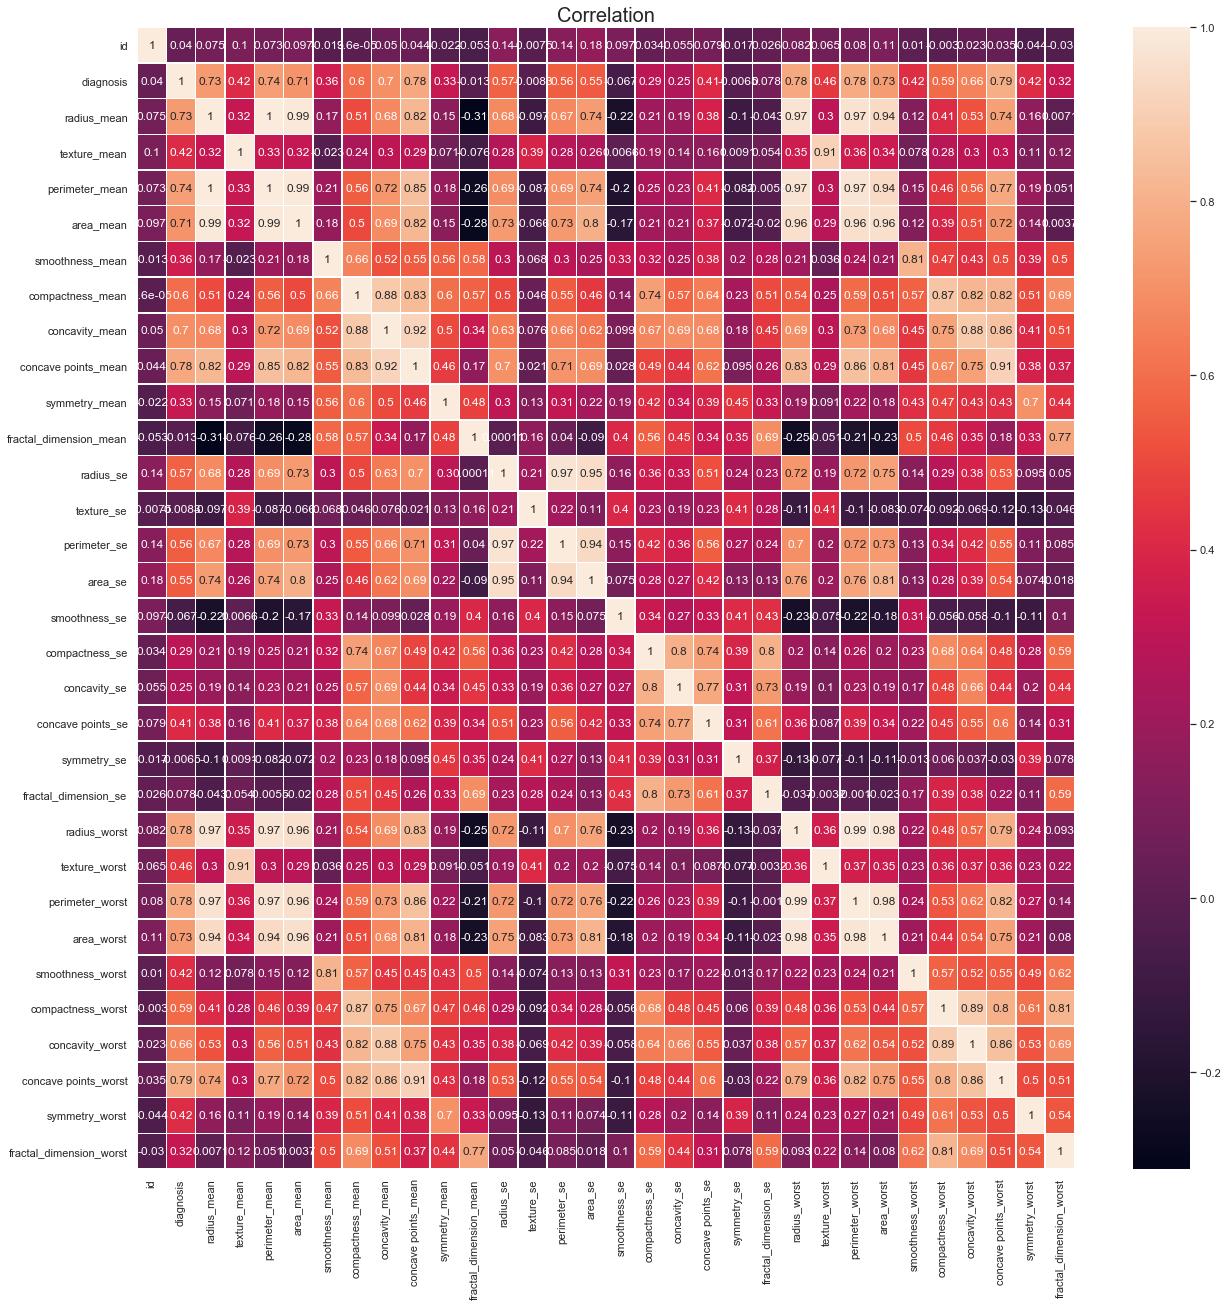

In [62]:
#Correlation

sns.set(font_scale=1)
plt.figure(figsize=(21,21))
plt.title("Correlation", fontsize=20)
sns.heatmap(df.corr(),Linewidth=0.5, annot=True, linecolor='white')

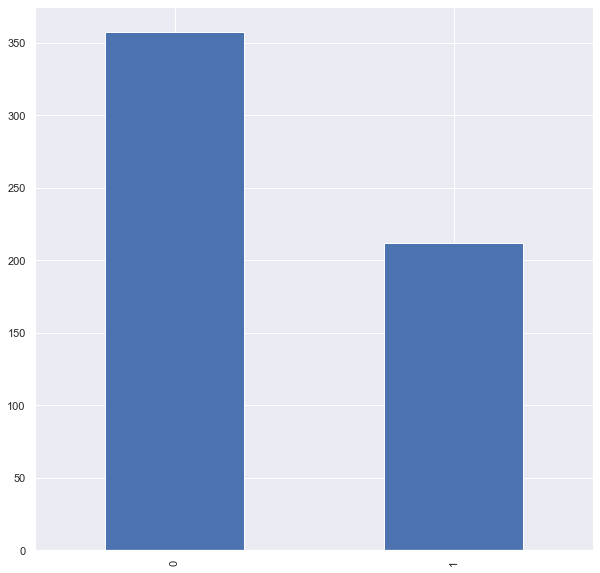

In [63]:
#Histogram for Diagnosis record counts

plt.figure(figsize=(10, 10))
df['diagnosis'].value_counts().plot(kind='bar')

#Label Encoding to convert categorical variables into numerical variables

In [64]:
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))

In [65]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [66]:
#Check for categorical variables

categorical_var_df_1 = df.columns[df.dtypes == object]
print(categorical_var_df_1)

Index([], dtype='object')


# Splitting dataset into train and test dataset

In [67]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

#Set target variable for Dataset

In [68]:
Y_train = X_train.loc[:,'diagnosis']
Y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int32

In [69]:
Y_test = X_test.loc[:,'diagnosis']
Y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int32

#Drop diagnosis from train and test

In [70]:
X_train.drop(columns='diagnosis', inplace=True)
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [71]:
X_test.drop(columns='diagnosis', inplace=True)
X_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,87930,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,859575,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,8670,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,907915,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,921385,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,913102,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,8610404,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,884689,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,883270,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


# Model Selection

#Decision Tree

In [72]:
DT = DecisionTreeClassifier(max_depth = 4)
DT.fit(X_train, Y_train)
dt_yhat = DT.predict(X_test)

In [73]:
#Check Accuracy of Decision Tree Model

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(Y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(Y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9298245614035088
F1 score of the Decision Tree model is 0.9069767441860465


#Random Forest

In [74]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, Y_train)
rf_yhat = rf.predict(X_test)

In [75]:
#Check Accuracy of Random Forest Model

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(Y_test, rf_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(Y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9649122807017544
F1 score of the Support Vector Machines model is 0.9523809523809524


#K-Nearest Neighbors

In [76]:
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_train, Y_train)
knn_yhat = KNN.predict(X_test)

In [77]:
#Check Accuracy of K-Nearest Neighbors model

print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(Y_test, knn_yhat)))
print('F1 score of the KNeighborsClassifier model is {}'.format(f1_score(Y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.7280701754385965
F1 score of the KNeighborsClassifier model is 0.5373134328358209


#XGBoost

In [78]:
xgb = XGBClassifier(max_depth = 9)
xgb.fit(X_train, Y_train)
xgb_yhat = xgb.predict(X_test)

[19:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\13158\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [79]:
#Check Accuracy of XGBoost

print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(Y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(Y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.956140350877193
F1 score of the XGBoost model is 0.9411764705882352


#SVM

In [80]:
svm = SVC()
svm.fit(X_train, Y_train)
svm_yhat = svm.predict(X_test)

In [81]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(Y_test, svm_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(Y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.6228070175438597
F1 score of the Support Vector Machines model is 0.0


# Balancing the unbalanced Data

#Using SMOTE to balance the unbalanced data

In [82]:
X_train_smote, Y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, Y_train)

In [83]:
smote_value_counts = Y_train_smote.value_counts()
print("Malignant cases are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(Y_train_smote)))

Malignant cases are 50.00% of the test set.


# Model Training after balancing the data

#Model Evaluation

#Random Forest

In [84]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, Y_train)
rf_yhat = rf.predict(X_test)

In [85]:
#Check Accuracy of Random Forest Model

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(Y_test, rf_yhat)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(Y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9649122807017544
F1 score of the Support Vector Machines model is 0.9523809523809524


#Decision Tree

In [86]:
DT = DecisionTreeClassifier(max_depth = 4)
DT.fit(X_train, Y_train)
dt_yhat = DT.predict(X_test)

In [87]:
#Check Accuracy of Decision Tree Model

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(Y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(Y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9473684210526315
F1 score of the Decision Tree model is 0.9302325581395349


#XGBoost

In [88]:
xgb = XGBClassifier(max_depth = 9)
xgb.fit(X_train_smote, Y_train_smote)
xgb_yhat = xgb.predict(X_test)

[19:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\13158\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [89]:
#Check Accuracy of XGBoost

print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(Y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(Y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9736842105263158
F1 score of the XGBoost model is 0.9647058823529412


In [90]:
#Selecting XGBoost model due to high accuracy and F1 score

In [91]:
confusion_matrix(Y_test, xgb_yhat)

array([[70,  1],
       [ 2, 41]], dtype=int64)

In [92]:
print(classification_report(Y_test, xgb_yhat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#Predicting Probability

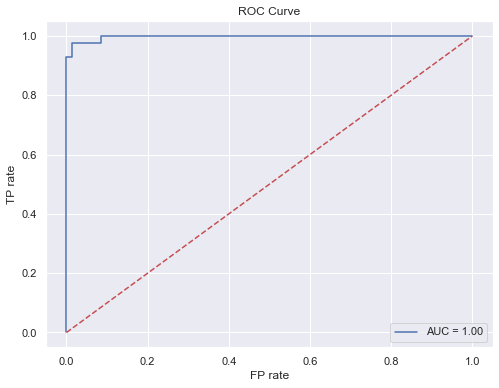

In [93]:
y_pred = xgb.predict_proba(X_test)[:,1]
fp_r, tp_r, t = metrics.roc_curve(Y_test, y_pred)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()